# albumentations サンプル

## Prepare

### import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2

### load image

In [2]:
img_path = '/workspaces/data/ObjectClassify/lemon/train_images/train_0000.jpg'

In [3]:
def get_img_float():
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
    img /= 255.0
    return img

def get_img_uint():
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img


### plot

In [4]:
def plot_img(transform, img_func):
    plt.subplot(1, 3, 1)
    plt.title('origin')
    plt.imshow(img_func)
    plt.subplot(1, 3, 2)
    plt.title('transformed 1')
    plt.imshow(transform(image=img_func)["image"])
    plt.subplot(1, 3, 3)
    plt.title('transformed 2')
    plt.imshow(transform(image=img_func)["image"])
    plt.show()
    plt.clf()
    plt.close()

In [5]:
img = get_img_uint()
plt.show()

w: 640, h: 640


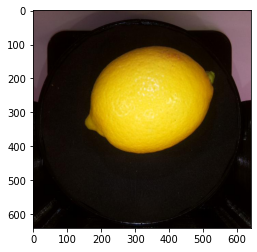

In [6]:
img = get_img_float()
print(f"w: {img.shape[1]}, h: {img.shape[0]}")
plt.imshow(img)
plt.show()

## 輝度変更

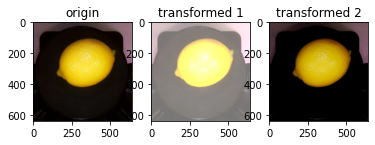

In [7]:
transform = A.RandomBrightness(limit=0.5, p=1)

plot_img(transform, get_img_uint())


## コントラスト変更

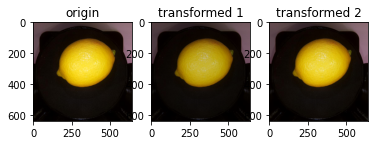

In [8]:
transform = A.RandomContrast(limit=(-0.5, 0.5), p=1)

plot_img(transform, get_img_uint())

## Cutout

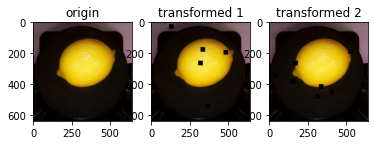

In [9]:
transform = A.Cutout(num_holes=8, max_h_size=30, 
                     max_w_size=30, fill_value=0, p=1)

plot_img(transform, get_img_uint())

## 均等化

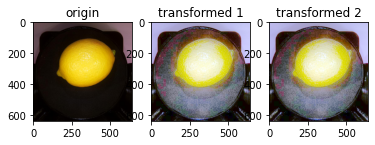

In [10]:
transform = A.Equalize(mode='cv', by_channels=True,
                       mask=None, mask_params=(), p=1)

plot_img(transform, get_img_uint())

## 反転

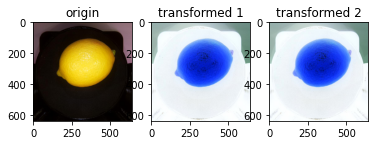

In [11]:
transform = A.InvertImg(p=1)

plot_img(transform, get_img_uint())

## 各色チャンネルのビット数を減らす

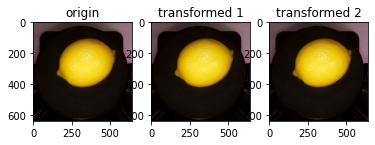

In [12]:
transform = A.Posterize(num_bits=8, p=1)

plot_img(transform, get_img_uint())

## 回転

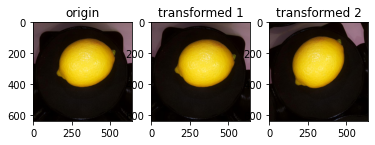

In [13]:
transform = A.Rotate(limit=180, interpolation=1, border_mode=4, p=1)

plot_img(transform, get_img_uint())

## シャープネス化

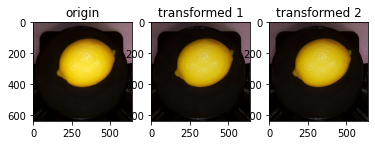

In [14]:
transform = A.IAASharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1)

plot_img(transform, get_img_uint())

## 閾値以上の画素値を反転させる

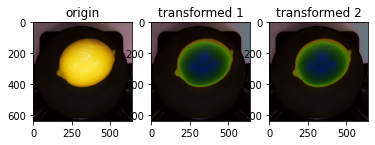

In [15]:
transform = A.Solarize(threshold=128, p=1)

plot_img(transform, get_img_uint())

In [ ]:
## 画素のデータ型を Float に変更

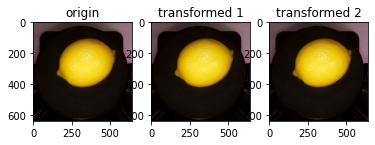

In [16]:
transform = A.ToFloat(max_value=None,p=1)

plot_img(transform, get_img_uint())

## 標準化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


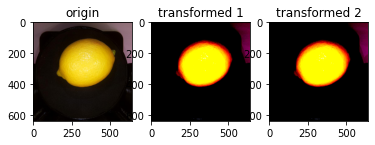

In [17]:
mean = (0.4914, 0.4822, 0.4465)
std = (0.2471, 0.2435, 0.2616)
transform = A.Normalize(mean=mean, std=std,  max_pixel_value=255, p=1)

plot_img(transform, get_img_uint())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


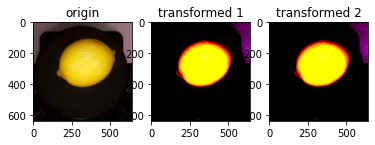

In [18]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
transform = A.Compose([
    A.ToFloat(max_value=1, p=1),
    A.Normalize(mean=mean, std=std,  max_pixel_value=1, p=1)
])

plot_img(transform, get_img_float())

## ランダムクロップ albumentations ver

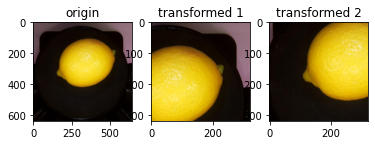

In [19]:
transform = A.RandomSizedCrop(min_max_height=[320, 540], 
                              height=320, width=320, w2h_ratio=1., p=1)

plot_img(transform, get_img_uint())

## ランダムクロップ torchvision ver

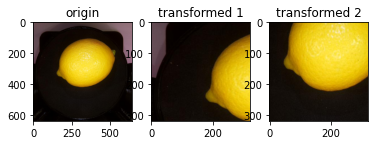

In [20]:
transform = A.RandomResizedCrop(height=320, width=320, scale=(0.08, 1.0), p=1)

plot_img(transform, get_img_uint())

## pixel check

In [21]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Compose([
    A.Normalize(mean=cifar10_mean, std=cifar10_std,  max_pixel_value=1, p=1)
])

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
img /= 255.0

_img = transform(image=img)["image"]
print(f"dtype:{img.dtype}, max: {img.max()}, min: {img.min()}")
print(f"dtype:{_img.dtype}, max: {_img.max()}, min: {_img.min()}")


dtype:float32, max: 1.0, min: 0.0
dtype:float32, max: 2.094278573989868, min: -1.9886685609817505


In [22]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Compose([
    #A.ToFloat(max_value=1, p=1),
    A.Normalize(mean=cifar10_mean, std=cifar10_std,  max_pixel_value=255, p=1)
])

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_img = transform(image=img)["image"]
print(f"dtype:{img.dtype}, max: {img.max()}, min: {img.min()}")
print(f"dtype:{_img.dtype}, max: {_img.max()}, min: {_img.min()}")


dtype:uint8, max: 255, min: 0
dtype:float32, max: 2.0942788124084473, min: -1.98866868019104


In [23]:
cifar10_mean = (0.4914, 0.4822, 0.4465)
cifar10_std = (0.2471, 0.2435, 0.2616)
transform = A.Compose([
    A.ToFloat(max_value=1, p=1),
])

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_img = transform(image=img)["image"]
print(f"dtype:{img.dtype}, max: {img.max()}, min: {img.min()}")
print(f"dtype:{_img.dtype}, max: {_img.max()}, min: {_img.min()}")


dtype:uint8, max: 255, min: 0
dtype:float32, max: 255.0, min: 0.0


## 使用例

In [317]:
def get_transforms_val(
    mean = (0.485, 0.456, 0.406),
    std = (0.229, 0.224, 0.225),
    resize = (128, 128),
    ) -> A.Compose:

    return A.Compose([
        A.RandomSizedCrop(
            min_max_height=[480, 640],
            height=resize[0],
            width=resize[1],
            w2h_ratio=1.,
            p=1),
        A.OneOf([
            # Color
            A.Equalize(
                mode='cv',
                by_channels=True,
                mask=None,
                mask_params=(),
                p=0.5),
            A.ToGray(p=0.5),
            # Luminance, Contrast
            A.RandomContrast(
                limit=(-0.2, 0.2),
                p=0.5),
            A.InvertImg(
                p=0.5),
            A.RandomBrightness(
                limit=0.2,
                p=0.5),
            A.Posterize(
                num_bits=4,
                p=0.5),
            A.Solarize(
                threshold=128,
                p=0.5),
        ], p=0.4),
        # Sharp, Blur
        A.OneOf([
            A.IAASharpen(
                alpha=(0.2, 0.5),
                lightness=(0.5, 1.0),
                p=0.5),
            A.Blur(
                blur_limit=(2, 5),
                p=0.5),
        ], p=0.2),
        # Rotate
        A.OneOf([
            A.HorizontalFlip(p=1),
            A.VerticalFlip(p=1),
            A.Transpose(p=1),
            A.RandomRotate90(p=1),
            A.Rotate(
                limit=180,
                interpolation=1,
                border_mode=4,
                p=0.5),
        ], p=0.5),
        # Dropout
        A.Cutout(
            num_holes=4,
            max_h_size=30,
            max_w_size=30,
            fill_value=0,
            p=1),
        #A.Normalize(
        # mean=mean,
        #    std=std,
        #    max_pixel_value=255,
        #    p=1),
        #ToTensorV2(p=1)
    ])
transforms = get_transforms_val()



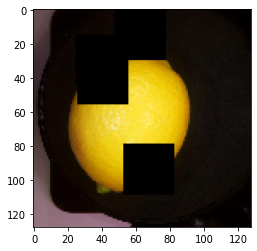

In [332]:
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

_img = transforms(image=img)["image"]
plt.imshow(_img)
plt.show()